# STAT3006 Assignment 4 <img src="https://i.kym-cdn.com/photos/images/newsfeed/001/852/165/c6e" height="32" width="32">

**Avatar Putra Pertama Azka - 47286238**

In [1]:
import pandas as pd
import numpy as np

# preprocessing
from sklearn.preprocessing import StandardScaler

# training utils
from sklearn.model_selection import cross_val_predict, GridSearchCV

# models
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# single variable analysis
from scipy.stats import ttest_ind, false_discovery_control

# metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# visualization
from matplotlib import pyplot as plt
import plotly.express as px

import seaborn as sns

# Dataset bizzzz

In [2]:
features: pd.DataFrame = pd.read_csv("data/Aaroe.csv", index_col=0)
labels: pd.DataFrame = pd.read_csv("data/Aaroelabels.csv")

In [3]:
features.head()

,GSM413367,GSM413368,GSM413369,GSM413370,GSM413371,GSM413372,GSM413373,GSM413374,GSM413375,GSM413376,...,GSM413487,GSM413488,GSM413489,GSM413490,GSM413491,GSM413492,GSM413493,GSM413494,GSM413495,GSM413496
100002,0.1134,0.0560,-0.2562,0.1638,0.2423,0.6244,0.5118,0.6083,-0.1223,0.3054,...,0.1386,-0.2830,-0.4520,-0.2199,0.3305,0.0104,-0.4842,0.1371,0.5243,-0.7144
100037,0.2036,-0.2881,0.3000,-0.1245,-0.1931,0.6167,0.3156,0.1385,-0.1324,-0.0705,...,-0.0941,-0.1529,-0.2488,-0.0012,0.2233,-0.0586,-0.3079,-0.3399,-0.1787,-0.4291
100058,-0.1888,-0.1852,-0.5350,0.0004,-0.1942,0.5297,-0.0255,0.5359,0.4558,0.4745,...,-0.0046,-0.2142,-0.1024,0.0988,-0.3493,0.3408,-0.0091,-0.0199,-0.0292,-0.5355
100079,0.4796,0.1218,-0.4838,0.0131,0.2402,0.2539,0.4935,0.6921,0.0927,0.4592,...,0.1737,-0.0121,-0.3563,-0.3899,-0.3027,-0.0069,-0.3533,0.0783,0.1998,-0.8642
100100,-0.4458,-0.0933,-0.2071,0.0706,-0.2367,0.1844,0.0015,-0.3982,-0.0905,-0.1620,...,-0.2226,-0.1462,-0.2799,0.1476,-0.0923,0.0413,-0.2852,0.0443,0.1640,-0.3789


In [4]:
labels.head()

,GSM413367,GSM413368,GSM413369,GSM413370,GSM413371,GSM413372,GSM413373,GSM413374,GSM413375,GSM413376,...,GSM413487,GSM413488,GSM413489,GSM413490,GSM413491,GSM413492,GSM413493,GSM413494,GSM413495,GSM413496
0,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal,...,cancer,cancer,cancer,cancer,cancer,cancer,cancer,cancer,cancer,cancer


In [5]:
print(features.shape)
print(labels.shape)

(11217, 121)
(1, 121)


## Preprocessing

In [6]:
ft = features.T
cols = ft.columns
idx = ft.index

scaler = StandardScaler()
ft_scaled = scaler.fit_transform(ft.to_numpy())

X = pd.DataFrame(ft_scaled, columns=cols, index=idx)
Y = labels.T.rename(columns={0: "label"})

In [7]:
data = X.join(Y['label'])

In [8]:
data.to_csv("data/processed.csv")

In [9]:
data.shape

(121, 11218)

In [10]:
X.isna().any().any()

False

In [11]:
CLASSNAMES = {
    'normal': 0.0,
    'cancer': 1.0
}

# 1. PCA on Gene Expression Dataset

Explained Variance: 1.0000000000000002
# of PCs: 121


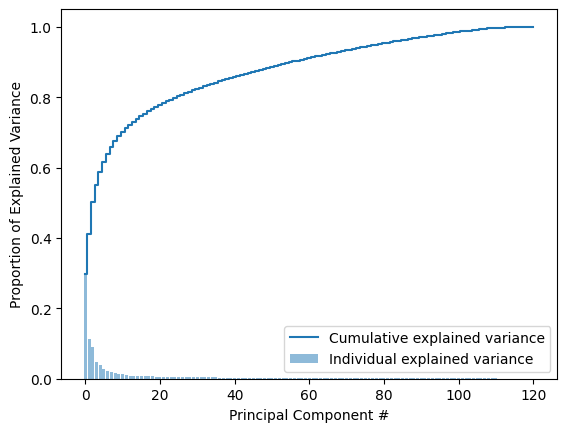

In [12]:
pca = PCA()
x = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_
cumsum_var = np.cumsum(explained_variance)
print(f"Explained Variance: {sum(pca.explained_variance_ratio_)}")
print(f"# of PCs: {pca.n_components_}")

plt.bar(
    range(0,len(explained_variance)),
    explained_variance,
    alpha=0.5,
    align='center',
    label='Individual explained variance'
)

plt.step(
    range(0,len(cumsum_var)),
    cumsum_var,
    where='mid',
    label='Cumulative explained variance'
)

plt.ylabel('Proportion of Explained Variance')
plt.xlabel('Principal Component #')
plt.legend(loc='best')
plt.savefig('figures/PCA_Explained_Variance_Curve')

plt.show()

Explained Variance: 0.5879975561529593
# of PCs: 5


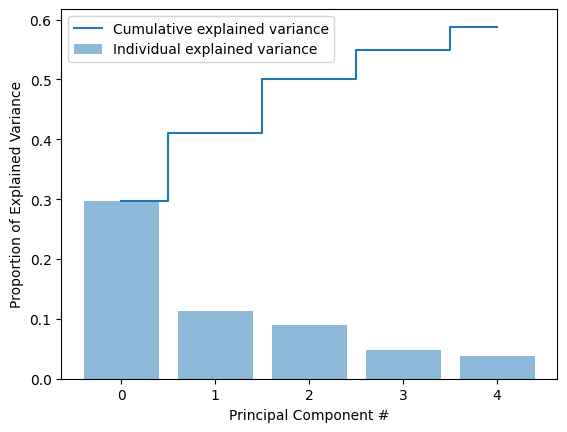

(121, 5)


In [13]:
# oh no duplication anyway
n_components = 5
pca_first_n = PCA(n_components=n_components)
first_n = pca_first_n.fit_transform(X)

explained_variance = pca_first_n.explained_variance_ratio_
cumsum_var = np.cumsum(explained_variance)
print(f"Explained Variance: {sum(pca_first_n.explained_variance_ratio_)}")
print(f"# of PCs: {pca_first_n.n_components_}")

plt.bar(
    range(0,len(explained_variance)),
    explained_variance,
    alpha=0.5,
    align='center',
    label='Individual explained variance'
)

plt.step(
    range(0,len(cumsum_var)),
    cumsum_var,
    where='mid',
    label='Cumulative explained variance'
)

plt.ylabel('Proportion of Explained Variance')
plt.xlabel('Principal Component #')
plt.legend(loc='best')

plt.savefig('figures/PCA_Top_5_Explained_Variance_Curve')
plt.show()

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'label'

print(first_n.shape)

fig = px.scatter_matrix(
    first_n,
    color=Y['label'],
    color_discrete_sequence=px.colors.qualitative.D3,
    opacity=0.8,
    dimensions=range(n_components),
    labels=labels,
    title=f'First {n_components} PCs, Total Explained Variance: {sum(pca_first_n.explained_variance_ratio_):.2f}%',
    width=720,
    height=720
)
fig.update_traces(diagonal_visible=True)
fig.show()

In [14]:
components = pd.DataFrame(pca.components_, columns=X.columns)
components.to_csv('supplementary/PrincipalComponentDirections.csv', index_label="Principal Component")

# 2. Single Variable Analysis

In [15]:
class SVA:
    def __init__(self, data: pd.DataFrame) -> None:
        label = data['label']
        self.n_variables = len(data.columns) - 1 # exclude response variable
        self.normals = data.loc[label == 'normal'].drop('label', axis='columns')
        self.cancers = data.loc[label == 'cancer'].drop('label', axis='columns')
        self.calcPvals()
        self.adjustPvals()
        self.df_unadjusted = pd.Series(self.pvals, index=data.drop('label', axis='columns').columns)
        self.df_adjusted = pd.Series(self.pvals_adjusted, index=data.drop('label', axis='columns').columns)

    def calcPvals(self):
        ttresults = ttest_ind(self.normals, self.cancers, equal_var=False)
        self.pvals = ttresults.pvalue

    def adjustPvals(self):
        # TODO: how does this work?
        self.pvals_adjusted = false_discovery_control(self.pvals, method='bh')

In [16]:
MAX_FDR = 0.1
sva = SVA(data)
# sva.pvals_adjusted[sva.pvals_adjusted < MAX_FDR]
significant_genes = sva.df_unadjusted[sva.df_adjusted < MAX_FDR]
significant_genes.to_csv('supplementary/SVASignificantGenes.csv', header=False)

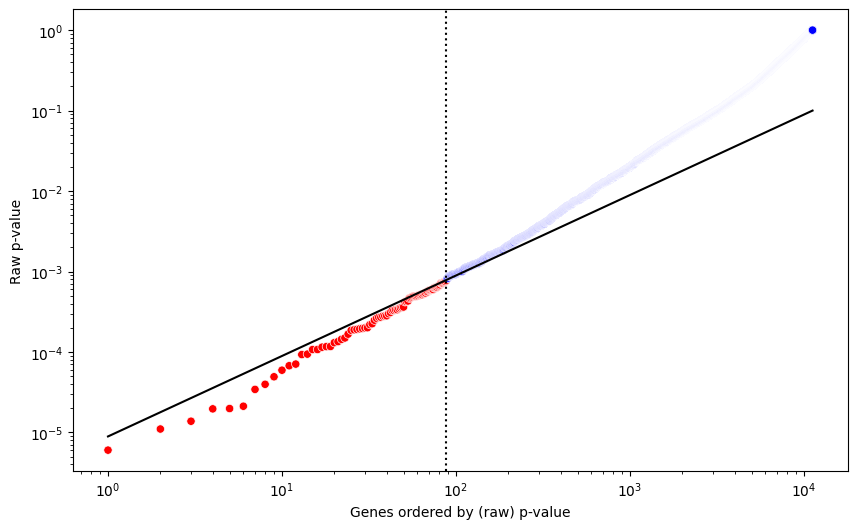

In [44]:
genes = pd.DataFrame({"unadjusted": sva.pvals, "adjusted": sva.pvals_adjusted}, index=X.columns)
genes_sorted = genes.sort_values(by=['unadjusted'])
genes_sorted['significant'] = np.where(genes_sorted['adjusted'] < MAX_FDR, 'red', 'blue')
genes_sorted['rank'] = range(1, len(genes_sorted) + 1)

def fdr_slope(j):
    return MAX_FDR * j / len(genes)

fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=genes_sorted, x='rank', y='unadjusted', c=genes_sorted['significant'])
# sns.lineplot(data=genes_sorted, x='adjusted', y='adjusted')
plt.axvline(x=len(significant_genes), c='black', linestyle=':')

xx = [1, len(genes)]
yy = [fdr_slope(1), fdr_slope(len(genes))]

plt.plot(xx, yy, '-', c='black')
plt.xlabel('Genes ordered by (raw) p-value')
plt.ylabel('Raw p-value')
# TODO: BH FDR control line
plt.xscale('log')
plt.yscale('log')
plt.savefig('figures/SVA_Significant_Genes')
plt.show()

In [18]:
asdf = data.copy()
asdf.loc[len(data)] = np.append(sva.pvals, 999)
asdf.sort_values(by=len(data), axis=1, inplace=True)
asdf.drop(len(data), inplace=True)
asdf
n_pcs = 5
top_n_pcs = asdf.iloc[:,:n_pcs]

fig = px.scatter_matrix(
    top_n_pcs,
    color=Y['label'],
    color_discrete_sequence=px.colors.qualitative.D3,
    opacity=0.8,
    dimensions=top_n_pcs.columns,
    # labels=labels,
    title='Top 5 Potentially Significant Genes, Based on p-values',
    width=720,
    height=720
)
fig.update_traces(diagonal_visible=True)
fig.show()

# 1. Significant PCs

In [19]:
data_reduced = pd.DataFrame(x).join(Y.reset_index()['label'])

In [20]:
sva_pc = SVA(data_reduced)
asdf = data_reduced.copy()
asdf.loc[len(data_reduced)] = np.append(sva_pc.pvals, 999)
asdf.sort_values(by=len(data_reduced), axis=1, inplace=True)
asdf.drop(len(data_reduced), inplace=True)
asdf
n_pcs = 5
top_n_pcs = asdf.iloc[:,:n_pcs]

fig = px.scatter_matrix(
    top_n_pcs,
    color=Y['label'],
    color_discrete_sequence=px.colors.qualitative.D3,
    opacity=0.8,
    dimensions=top_n_pcs.columns,
    # labels=labels,
    title='Top 5 Potentially Significant PCs, Based on p-values',
    width=720,
    height=720
)
fig.update_traces(diagonal_visible=True)
fig.show()

/home/avatar/Documents/UQ S2 2023/STAT3006/A4/code/env/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:551: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



# 3. Defining Binary Logistic Regression With Lasso Penalty

# 4. Benefits & Drawbacks of using PCA for Dimensionality Reduction

# 5. Classification

### Setting Up Models

In [21]:
svm = SVC(kernel="linear")
lasso = LogisticRegression(
    penalty='l1', 
    solver='liblinear',
    random_state=69)

# search space based on https://ai-ml-analytics.com/Jupyter_notebook/Blog%20-%2020%20-%20Hyperparameter%20tuning%20using%20Ridge%20and%20Lasso%20Regression.html
# search_space = [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]
search_space = np.logspace(-3, 4, 20)
hyperparams_lasso = {
    'C': search_space # lambda hyperparameter
}

kfolds = 10
lassoGrid = GridSearchCV(lasso, hyperparams_lasso, cv=kfolds, scoring="accuracy", n_jobs=-1)
svmGrid = GridSearchCV(svm, {}, cv=kfolds, scoring='accuracy', n_jobs=-1)

svmGrid.fit(X, Y.to_numpy().ravel())
print(svmGrid.best_score_)
print(svmGrid.best_params_)

lassoGrid.fit(X, Y.to_numpy().ravel())
print(lassoGrid.best_score_)
print(lassoGrid.best_params_)

0.7032051282051281
{}
0.7352564102564102
{'C': 61.58482110660255}


In [22]:
search_space

array([1.00000000e-03, 2.33572147e-03, 5.45559478e-03, 1.27427499e-02,
       2.97635144e-02, 6.95192796e-02, 1.62377674e-01, 3.79269019e-01,
       8.85866790e-01, 2.06913808e+00, 4.83293024e+00, 1.12883789e+01,
       2.63665090e+01, 6.15848211e+01, 1.43844989e+02, 3.35981829e+02,
       7.84759970e+02, 1.83298071e+03, 4.28133240e+03, 1.00000000e+04])

In [23]:
print(lassoGrid.best_score_)
print(lassoGrid.best_params_)
print(svmGrid.best_score_)
print(svmGrid.best_params_)

0.7352564102564102
{'C': 61.58482110660255}
0.7032051282051281
{}


In [24]:
lassoFinal = lassoGrid.best_estimator_
svmFinal = svmGrid.best_estimator_

## b. CV-based Error Rate Estimates

### Error Rates

In [25]:
lasso.set_params(C=lassoGrid.best_params_['C'])
pred_lasso_cv = cross_val_predict(lasso, X, Y.to_numpy().ravel(), cv=kfolds, n_jobs=-1)
pred_svm_cv = cross_val_predict(svm, X, Y.to_numpy().ravel(), cv=kfolds, n_jobs=-1)
pred_lasso_final = lassoFinal.predict(X)
pred_svm_final = svmFinal.predict(X)

In [26]:
print("Lasso CV Error Estimates\n" + classification_report(Y, pred_lasso_cv))
print("SVM CV Error Estimates\n" + classification_report(Y, pred_svm_cv))
print("Lasso Final Classifier Accuracy\n" + str(accuracy_score(Y, pred_lasso_final)))
print("SVM Final Classifier Accuracy\n" + str(accuracy_score(Y, pred_svm_final)))

# save to tex
def save_report(pred, filename):
    report = classification_report(Y, pred, output_dict=True)
    df = pd.DataFrame(report).T.drop(['weighted avg', 'macro avg'])
    df.to_latex('supplementary/' + filename)

save_report(pred_lasso_cv, 'LassoReport.tex')
save_report(pred_svm_cv, 'SVMReport.tex')

Lasso CV Error Estimates
              precision    recall  f1-score   support

      cancer       0.82      0.67      0.74        67
      normal       0.67      0.81      0.73        54

    accuracy                           0.74       121
   macro avg       0.74      0.74      0.74       121
weighted avg       0.75      0.74      0.74       121

SVM CV Error Estimates
              precision    recall  f1-score   support

      cancer       0.74      0.72      0.73        67
      normal       0.66      0.69      0.67        54

    accuracy                           0.70       121
   macro avg       0.70      0.70      0.70       121
weighted avg       0.70      0.70      0.70       121

Lasso Final Classifier Accuracy
1.0
SVM Final Classifier Accuracy
1.0


## a. Characterisation of Each Class

### Confusion Matrices

In [45]:
def plot_confusion_matrix(truth, pred, title: str):
    ax = plt.subplot()

    cmatrix = sns.heatmap(confusion_matrix(truth, pred), annot=True, fmt='d')
    ax.set_title(title)
    ax.xaxis.set_ticklabels(CLASSNAMES.keys())
    ax.yaxis.set_ticklabels(CLASSNAMES.keys())
    ax.set_xlabel("Predicted Diagnosis")
    ax.set_ylabel("Actual Diagnosis")
    cmatrix.plot()
    plt.savefig("figures/"+title.replace(" ", "_"))
    plt.show()
    plt.clf()

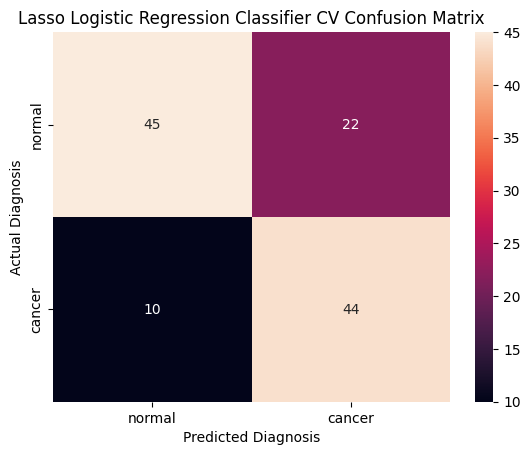

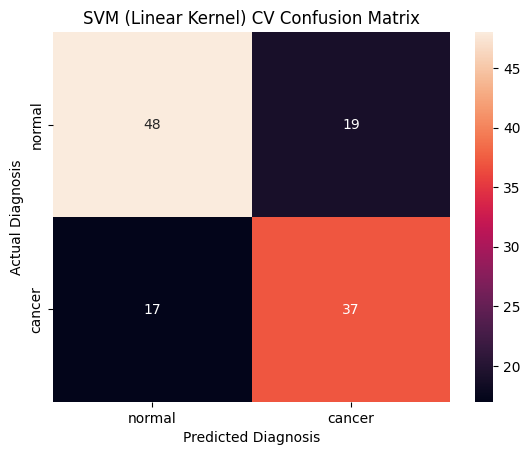

<Figure size 640x480 with 0 Axes>

In [46]:
plot_confusion_matrix(
    Y['label'], 
    pred_lasso_cv,
    "Lasso Logistic Regression Classifier CV Confusion Matrix")

plot_confusion_matrix(
    Y['label'], 
    pred_svm_cv,
    "SVM (Linear Kernel) CV Confusion Matrix")

## c. Finding The Optimal Value of λ

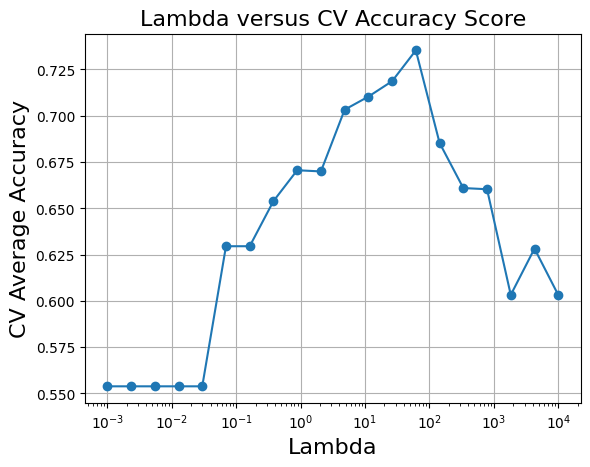

In [29]:
# adapted from: https://stackoverflow.com/a/43645640
def plot_grid_search(cv_results, search_space):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean)

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    ax.plot(search_space, scores_mean, '-o')

    ax.set_title("Lambda versus CV Accuracy Score", fontsize=16)
    ax.set_xlabel("Lambda", fontsize=16)
    ax.set_ylabel('CV Average Accuracy', fontsize=16)
    ax.set_xscale('log')
    ax.grid('on')

    plt.savefig("figures/"+ax.get_title().replace(" ", "_"))

# Calling Method 
plot_grid_search(lassoGrid.cv_results_, search_space) 

### Gene Importance

In [30]:
# np.nonzero(lassoFinal.coef_)[1]
def get_gene_importance(clf):
    df_coef = features.copy()
    df_coef['coef'] = clf.coef_[0]
    df_coef['coef_abs'] = np.abs(df_coef['coef'])
    df_coef.sort_values(by='coef_abs', inplace=True, ascending=False)
    df_coef_nonzero = df_coef[df_coef['coef'] != 0]

    return df_coef_nonzero['coef']


gene_importance_lasso = get_gene_importance(lassoFinal)
gene_importance_svm = get_gene_importance(svmFinal)

In [31]:
gene_importance_lasso.to_csv('supplementary/GeneImportanceLasso', header=False)
gene_importance_lasso.to_latex('supplementary/GeneImportanceLasso.tex')
gene_importance_svm.head(50).to_csv('supplementary/GeneImportanceSVM', header=False)
gene_importance_svm.head(50).to_latex('supplementary/GeneImportanceSVM.tex')

# 6. Results Comparison

In [32]:
top_5_lasso = data[gene_importance_lasso.head(5).index]

fig = px.scatter_matrix(
    top_5_lasso,
    color=Y['label'],
    color_discrete_sequence=px.colors.qualitative.D3,
    opacity=0.8,
    dimensions=top_5_lasso.columns,
    title='Top 5 Genes Ordered by Lasso Logistic Regression Classifer',
    width=720,
    height=720
)
fig.update_traces(diagonal_visible=True)
fig.show()

In [33]:
top_5_svm = data[gene_importance_svm.head(5).index]

fig = px.scatter_matrix(
    top_5_svm,
    color=Y['label'],
    color_discrete_sequence=px.colors.qualitative.D3,
    opacity=0.8,
    dimensions=top_5_svm.columns,
    title='Top 5 Genes Ordered by SVM Classifier',
    width=720,
    height=720
)
fig.update_traces(diagonal_visible=True)
fig.show()

## Compiling Top 10s from All Methods

In [34]:
top_10_lasso = data[gene_importance_lasso.head(10).index]
top_10_svm = data[gene_importance_svm.head(10).index]
top_10_sva = data[genes_sorted.head(10).index]
bottom_10_lasso = data[gene_importance_lasso.tail(10).index]
bottom_10_svm = data[gene_importance_svm.tail(10).index]
bottom_10_sva = data[genes_sorted.tail(10).index]

In [40]:
top_10s = pd.DataFrame({
    'lasso': top_10_lasso.columns,
    'svm': top_10_svm.columns,
    'sva': top_10_sva.columns
}, index=range(10))
top_10s

,lasso,svm,sva
0,105982,105982,134910
1,162796,186433,168498
2,710141,107457,107457
3,229944,216357,207178
4,182204,168498,192905
5,221030,213145,208343
6,106478,192006,200120
7,192905,156497,177738
8,168498,712587,110790
9,186433,125981,149826


## Fit Model to Top 10s

In [41]:
clf = LogisticRegression(random_state=42)
def idk(top_10):
    # clf.fit(top_10, Y.to_numpy().ravel())
    pred = cross_val_predict(clf, top_10, Y.to_numpy().ravel(), method='predict_proba', cv=kfolds, n_jobs=-1)
    # print("CV Error Estimates\n" + classification_report(Y, pred))
    print(roc_auc_score(Y, pred[:,1]))

In [42]:
idk(top_10_lasso)
idk(top_10_svm)
idk(top_10_sva)

0.8595909342178
0.8626312880044223
0.8018242122719735


In [43]:
idk(bottom_10_lasso)
idk(bottom_10_svm)
idk(bottom_10_sva)

0.6299060254284135


0.49115533443891657
0.08761746821448316
